<a href="https://colab.research.google.com/github/RoshiniSenthilkumar/Mini-Project---Digit-Recogniser/blob/master/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [46]:
x_train , x_test = x_train / 255.0 , x_test / 255.0
x_train = tf.keras.utils.normalize(x_train, axis=-1)
x_test = tf.keras.utils.normalize(x_test,axis=-1)
print(y_train)

[5 0 4 ... 5 6 8]


In [47]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=512 , activation='relu'))
model.add(tf.keras.layers.Dense(units=512 , activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10 , activation='softmax'))
model.compile(optimizer='adam' , loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['sparse_categorical_accuracy'])

In [48]:
mc = tf.keras.callbacks.ModelCheckpoint('model_digits{epoch:d}.h5', 
                                     save_weights_only=False, period=10)

In [49]:
history = model.fit(x_train,y_train,epochs=10, callbacks=[mc])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.5535 - sparse_categorical_accuracy: 0.9114
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.5081 - sparse_categorical_accuracy: 0.9534
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.5003 - sparse_categorical_accuracy: 0.9610
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.4951 - sparse_categorical_accuracy: 0.9661
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.4930 - sparse_categorical_accuracy: 0.9680
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.4905 - sparse_categorical_accuracy: 0.9707
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4889 - sparse_categorical_accuracy: 0.9723
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4901 - sparse_categorical_accuracy: 0.9710
Epoch 9/10
1875/1875 [==

In [50]:
#evaluate saved model vs original model
m_new=tf.keras.models.load_model('model_digits10.h5')
# saved model
m_new.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4916 - sparse_categorical_accuracy: 0.9696


[1.4915637969970703, 0.9696000218391418]

In [51]:
#current model
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4916 - sparse_categorical_accuracy: 0.9696


[1.4915637969970703, 0.9696000218391418]

In [52]:
y_pred = model.predict_classes(x_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [53]:
y_pred[0]

7

In [54]:
np.argmax(y_pred[0])

0

In [55]:
np.argmax(model.predict(x_test), axis=-1)

array([7, 2, 1, ..., 4, 5, 6])

In [56]:
# Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix

In [57]:
accuracy_score(y_pred,y_test)

0.9696

In [58]:
confusion_matrix(y_pred,y_test)

array([[ 966,    0,    1,    0,    2,    4,    3,    0,    5,    3],
       [   0, 1115,    0,    0,    0,    0,    4,    5,    1,    5],
       [   1,    4, 1015,    5,    6,    0,    1,   11,    8,    0],
       [   2,    5,    5,  995,    1,   21,    1,   13,   10,   14],
       [   0,    0,    1,    0,  953,    3,    2,    7,    2,   21],
       [   1,    1,    0,    2,    0,  845,    3,    0,    7,    2],
       [   6,    2,    2,    0,    7,    5,  939,    0,    1,    1],
       [   2,    3,    6,    2,    0,    0,    0,  975,    1,    5],
       [   1,    5,    2,    5,    1,    9,    5,    2,  936,    1],
       [   1,    0,    0,    1,   12,    5,    0,   15,    3,  957]])

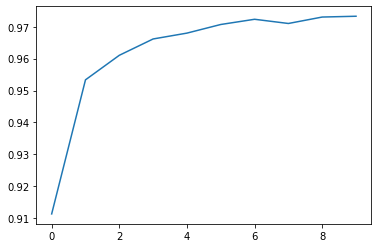

In [59]:
plt.plot(history.history['sparse_categorical_accuracy'])

In [60]:
model.get_weights()

[array([[-1.1861250e-03, -2.8967857e-04,  5.4887347e-02, ...,
         -6.1621998e-02,  2.1568060e-02, -3.9131489e-02],
        [-2.6300065e-02, -3.6978543e-02, -3.4273971e-02, ...,
         -1.8586248e-02, -1.4992662e-02, -6.6912420e-02],
        [-8.8343583e-03,  3.0065782e-02, -1.7485026e-02, ...,
         -3.2562125e-02, -6.2696636e-05, -6.6711962e-02],
        ...,
        [ 3.8351469e-02,  1.6369112e-02, -2.4631307e-02, ...,
          4.5398533e-02, -1.4798254e-02,  4.2822897e-02],
        [-3.9927147e-02,  4.9778379e-02,  6.5218389e-02, ...,
         -6.7863151e-02, -5.3548142e-03,  8.2733259e-03],
        [ 2.6685283e-02, -6.1601736e-02, -4.8845276e-02, ...,
         -2.6599545e-02,  3.9683759e-02,  4.5750104e-02]], dtype=float32),
 array([ 0.004182  , -0.02114743, -0.06181288, -0.05774423, -0.02898738,
         0.03596599, -0.07379579,  0.06383687, -0.01523655, -0.0288624 ,
        -0.13401769, -0.07174738, -0.05435665,  0.06258576, -0.0610855 ,
        -0.04304955, -0.0488889

In [61]:
loss , accuracy = model.evaluate(x_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4916 - sparse_categorical_accuracy: 0.9696


In [62]:
print(accuracy)

0.9696000218391418


In [63]:
print(loss)

1.4915637969970703


In [64]:
model.save('model_digits.h5')